# Using Deep Learning approach 
Without dimensionality reduction based approach

## Reading the data

In [10]:
# for mounting drive with google colabs

In [0]:
!mkdir -p  drive
!google-drive-ocamlfuse drive

In [5]:
!ls

adc.json  drive  sample_data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
plt.style.use('ggplot')
%matplotlib inline

In [2]:
data_train = pd.read_csv('data/training.csv')

In [3]:
data_test = pd.read_csv('data/test.csv')

In [4]:
print(data_train.shape, data_test.shape)

(7049, 31) (1783, 2)


In [5]:
print(data_train.count())

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [6]:
data_train.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


In [7]:
data_train.keys()

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

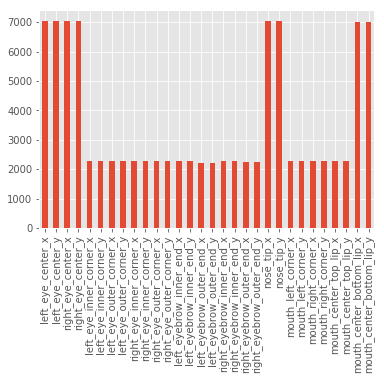

In [8]:
data_train.describe().loc['count'].plot.bar()

In [9]:
data_train = data_train.dropna()
data_train.shape

(2140, 31)

In [10]:
def string2image(string):
    """Converts a string to a numpy array."""
    return np.array([int(item) for item in string.split()]).reshape((96, 96))

def plot_faces_with_keypoints(df, nrows=5, ncols=5):
    """Randomly displays some faces from the training data with their keypoints."""
    selection = np.random.choice(df.index, size=(nrows*ncols), replace=False)
    image_strings = df.loc[selection]['Image']
    keypoint_cols = list(df.columns)[:-1]
    keypoints = df.loc[selection][keypoint_cols]
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, (iloc, keypoint), ax in zip(image_strings, keypoints.iterrows(), axes.ravel()):
        xy = keypoint.values.reshape((15, 2))
        ax.imshow(string2image(string), cmap='gray')
        ax.plot(xy[:, 0], xy[:, 1], 'ro')
        ax.axis('off')

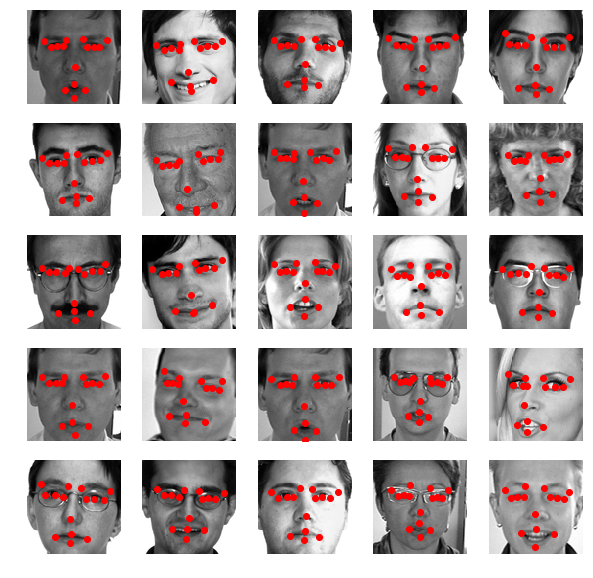

In [11]:
plot_faces_with_keypoints(data_train)

In [12]:
train_key_points_y = np.array(data_train.iloc[:,0:-1]).astype(np.float32)
train_images = data_train.iloc[:,-1]
test_images = data_test.iloc[:, -1]
np.max(train_key_points_y), np.min(train_key_points_y)

(95.80898, 3.8262432)

In [13]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import MinMaxScaler

# output_pipe = make_pipeline(
#     MinMaxScaler(feature_range=(-1, 1))
# )

# train_keypoints = output_pipe.fit_transform(train_key_points_y)
train_keypoints = (train_key_points_y - 48)/48

In [14]:
np.min(train_keypoints), np.max(train_keypoints)

(-0.9202866, 0.9960205)

In [15]:
train_images = train_images.reshape(-1,1)
test_images = test_images.reshape(-1,1)

/home/apuayush/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/home/apuayush/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [16]:
print(train_images.shape, test_images.shape, train_keypoints.shape)

(2140, 1) (1783, 1) (2140, 30)


In [17]:
def reform_data(img_str):
    t1 = img_str[0].split()
    t2 = np.array(t1).astype(np.float32)
    t3 = t2.reshape(96,96,1)
    return t3/255
train_images = np.apply_along_axis(reform_data,1, train_images)
test_images = np.apply_along_axis(reform_data,1, test_images)

In [18]:
print(train_images.shape, test_images.shape, train_keypoints.shape)

(2140, 96, 96, 1) (1783, 96, 96, 1) (2140, 30)


### The images are stored in test_image, train_image which is a 96x96 dimensional vector converted image and all the X and Y coordinates of key point features is mentioned in train_key_points, test_key_points
### The key features are 
'left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'

In [19]:
# Free the memory
del data_test
del data_train

[65.53123, 31.615677, 58.959293, 72.23059, 39.89886, 24.80708, 63.391872, 80.01907, 47.535923, 16.391115, 50.696045, 49.81911, 26.90302, 42.215862, 41.338562] [40.61795, 34.17345, 41.054867, 42.16536, 38.03287, 33.245007, 35.218998, 34.107494, 31.566914, 18.183493, 66.044136, 76.94862, 74.25027, 77.453735, 77.77275]


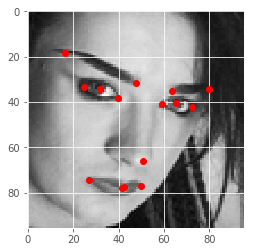

In [20]:
def show_img(img, keypoint=None):
# Sample images
    img = img.reshape(96,96)

    if keypoint is not None:
        x = []
        y = []
        for i in range(0,30,2):
            x.append(keypoint[i])
            y.append(keypoint[i+1])

        print(x,y)
        plt.figure()
        plt.plot(x,y, marker='o',linestyle='', color='r', label = "keypoints",)
    plt.imshow(img, cmap='gray')
  

import random
k = random.randint(0,2000)
t_img = train_images[k]
t_kpnts = train_key_points_y[k]
show_img(t_img, t_kpnts)

## Data Preprocessing 
### 1- data augemntation
### 2- Gaussian blur of image 
### 3- Histogram stretching

In [21]:
def data_augmentation(img_data, img_keypoints):
  new_data = list(img_data.copy())
  new_keypoints = list(img_keypoints.copy())
  for img, keypnt in zip(img_data.copy(), img_keypoints.copy()):
    new_data.append(cv2.flip(img, 1).reshape(96,96,1))
    p = []
    for i in range(0,30):
      if i%2 == 0:
        p.append(96 - keypnt[i])
      else:
        p.append(keypnt[i])
    new_keypoints.append(np.array(p))
    p = []
    
  return np.array(new_data), (np.array(new_keypoints) - 48 )/48

train_images_1, train_keypoints_1 = data_augmentation(train_images, train_key_points_y)

### Data Augmentation

[-0.34100644 -0.19248788  0.39202356 -0.20755386 -0.21550703 -0.17715915
 -0.48024829 -0.19017394  0.24829531 -0.18221148  0.53732808 -0.19843952
 -0.17484188 -0.33755024 -0.60343075 -0.33654455  0.14850616 -0.35855512
  0.62652663 -0.36428372 -0.13219468  0.25790668 -0.25004975  0.60057878
  0.26188485  0.59097147 -0.01447749  0.58680836 -0.01535583  0.63580577]
[31.631690979003906, 66.81713104248047, 37.655662536621094, 24.948081970214844, 59.918174743652344, 73.791748046875, 39.60758972167969, 19.035324096679688, 55.1282958984375, 78.07327842712402, 41.65465545654297, 35.99761199951172, 60.570472717285156, 47.30508041381836, 47.26292037963867] [38.760581970214844, 38.03741455078125, 39.496360778808594, 38.87165069580078, 39.253849029541016, 38.47490310668945, 31.797588348388672, 31.845861434936523, 30.78935432434082, 30.514381408691406, 60.379520416259766, 76.8277816772461, 76.36663055419922, 76.16680145263672, 78.5186767578125]


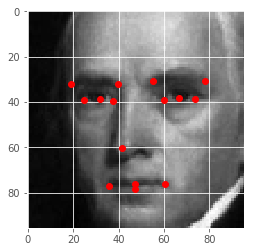

In [22]:
print(train_keypoints_1[k+2140])
show_img(train_images_1[k+2140],train_keypoints_1[k+2140]*48+48)

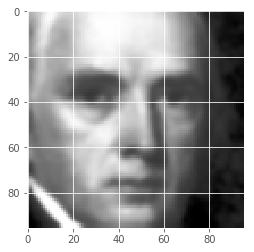

In [23]:
# Histogram stretching and blur
from skimage import exposure
t_img_1 = cv2.GaussianBlur(t_img,(5,5),0)
img_eq = exposure.equalize_hist(t_img_1)
show_img(img_eq)


for i in range(len(train_images)):
    t_img_1 = cv2.GaussianBlur(train_images[i],(5,5),0)
    img_eq = exposure.equalize_hist(t_img_1)
    train_images[i,:,:,:] = img_eq.reshape(96,96,1)


## Building The Model

In [21]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten

Using TensorFlow backend.
/home/apuayush/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [22]:
def create_model(inpt=28):
  model = Sequential()

  model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                              activation='relu', input_shape=(inpt, inpt, 1)))
  model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                              activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                              activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                              activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(256, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(30, activation="linear"))

  return model

In [23]:
model = create_model(96)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
__________

In [27]:
# model.load_weights('drive/data/facial_keypoint_weights.h5')
# del model

In [29]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.1, decay=1e-5, momentum=0.96, nesterov=True)
model.compile(optimizer='sgd', loss='mse', metrics=['mae', 'accuracy'])
json_model = model.to_json()

with open("model96.json", "w") as json_file:
    json_file.write(json_model)
    


In [ ]:
epochs = 100
history = model.fit(train_images, train_keypoints, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20)

Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 62s 36ms/step - loss: 0.0584 - mean_absolute_error: 0.1919 - acc: 0.2640 - val_loss: 0.0432 - val_mean_absolute_error: 0.1736 - val_acc: 0.4299
Epoch 2/100
1712/1712 [==============================] - 32s 19ms/step - loss: 0.0367 - mean_absolute_error: 0.1523 - acc: 0.3271 - val_loss: 0.0370 - val_mean_absolute_error: 0.1589 - val_acc: 0.4322
Epoch 3/100
1712/1712 [==============================] - 27s 16ms/step - loss: 0.0324 - mean_absolute_error: 0.1428 - acc: 0.3464 - val_loss: 0.0345 - val_mean_absolute_error: 0.1528 - val_acc: 0.4346
Epoch 4/100
1712/1712 [==============================] - 27s 16ms/step - loss: 0.0293 - mean_absolute_error: 0.1358 - acc: 0.3382 - val_loss: 0.0336 - val_mean_absolute_error: 0.1511 - val_acc: 0.4369
Epoch 5/100
1712/1712 [==============================] - 27s 16ms/step - loss: 0.0270 - mean_absolute_error: 0.1300 - acc: 0.3820 - val_loss: 0.0315 

Epoch 82/100
 420/1712 [======>.......................] - ETA: 23s - loss: 0.0076 - mean_absolute_error: 0.0675 - acc: 0.6857

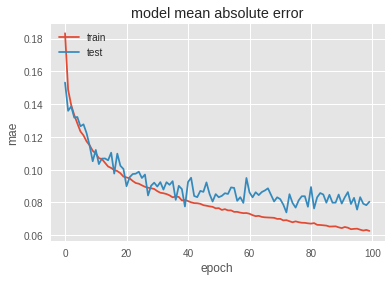

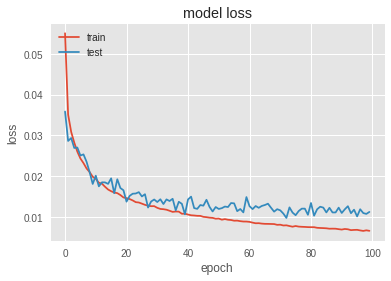

In [217]:
def visualize(history):
  plt.plot(history.history['mean_absolute_error'])
  plt.plot(history.history['val_mean_absolute_error'])
  plt.title('model mean absolute error')
  plt.ylabel('mae')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
visualize(history)

In [218]:
img = test_images[0]
pre = model.predict(np.array([img]))
print(pre.shape)

(1, 30)


In [219]:
k = pre.reshape(-1,1)
k.shape

(30, 1)

[array([63.38857], dtype=float32), array([33.005672], dtype=float32), array([57.951218], dtype=float32), array([70.35718], dtype=float32), array([37.84366], dtype=float32), array([25.554531], dtype=float32), array([54.92872], dtype=float32), array([75.338104], dtype=float32), array([40.669155], dtype=float32), array([20.147215], dtype=float32), array([47.8774], dtype=float32), array([60.756973], dtype=float32), array([35.114986], dtype=float32), array([47.50558], dtype=float32), array([47.69186], dtype=float32)] [array([38.799553], dtype=float32), array([38.941917], dtype=float32), array([39.83293], dtype=float32), array([39.446785], dtype=float32), array([40.04092], dtype=float32), array([39.199566], dtype=float32), array([31.525223], dtype=float32), array([32.06559], dtype=float32), array([31.962255], dtype=float32), array([33.157677], dtype=float32), array([55.210148], dtype=float32), array([72.07354], dtype=float32), array([71.45054], dtype=float32), array([68.306046], dtype=float3

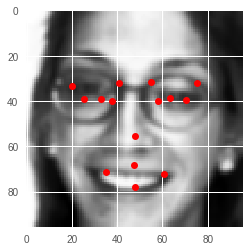

In [225]:
import random
k = random.randint(0, train_images.shape[0])
img = train_images[k]
pre = model.predict(np.array([img]))
pre = pre.reshape(-1,1)
pre = pre*48+48
show_img(img, pre)

# Advanced Pre-processing

1. LBP - Local Binary Patterns
2. PCA - Principle Component Analysis

## 1- Using LBP to remove noise

The first step in constructing the LBP texture descriptor is to convert the image to grayscale. For each pixel in the grayscale image, we select a neighborhood of size r surrounding the center pixel. A LBP value is then calculated for this center pixel and stored in the output 2D array with the same width and height as the input image.

For example, let’s take a look at the original LBP descriptor which operates on a fixed 3 x 3 neighborhood of pixels just like this:

![alt text](https://www.pyimagesearch.com/wp-content/uploads/2015/12/lbp_thresholding.jpg)

Image Source - https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/

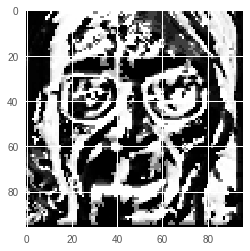

In [40]:
from skimage.feature import local_binary_pattern

def get_lbp_features(img):
  radius = 3
  n_points = 8*3
  METHOD = 'default'

  lbp_features = local_binary_pattern(img, n_points, radius, METHOD)
  return lbp_features

img = train_images[48].reshape(96,96)
img_lbp_features = get_lbp_features(img)
show_img(img_lbp_features)

In [41]:
img_lbp_features

array([[2.8835840e+06, 3.9321600e+05, 6.5536000e+04, ..., 6.1440000e+04,
        0.0000000e+00, 5.2019200e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.6009600e+05,
        0.0000000e+00, 2.6009600e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.1366400e+05,
        0.0000000e+00, 2.6112000e+05],
       ...,
       [1.2583039e+07, 1.2583143e+07, 4.1943040e+06, ..., 6.5408000e+04,
        6.5376000e+04, 3.2704000e+04],
       [8.3887350e+06, 8.3888630e+06, 8.3887340e+06, ..., 1.6256000e+04,
        1.6352000e+04, 1.6192000e+04],
       [1.2700000e+02, 3.1000000e+01, 5.1100000e+02, ..., 8.0640000e+03,
        8.1600000e+03, 8.0000000e+03]])

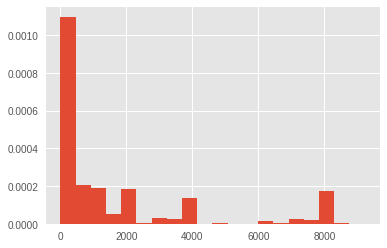

In [42]:
img_lbp_features/=255
plt.hist(img_lbp_features.ravel(), normed=True, bins=20, range=(0, 96*96))
plt.show()


In [0]:
lbp_train_imgs = []
for img in train_images_1:
  img = train_images[k].reshape(96,96)
  img_lbp_features = get_lbp_features(img)
  lbp_train_imgs.append(img_lbp_features)
lbp_train_imgs = np.array(lbp_train_imgs)

## 2 - Using PCA to reduce dimension
Creating eigen faces using principle component analysis

In [24]:
reformed_imgs = train_images.reshape(-1, 96*96)
reformed_imgs.shape

(2140, 9216)

In [25]:
reformed_imgs[0]

array([0.93333334, 0.9254902 , 0.92941177, ..., 0.27450982, 0.29411766,
       0.3529412 ], dtype=float32)

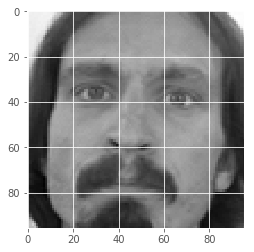

In [26]:
show_img(reformed_imgs[0])

In [27]:
from sklearn.decomposition import PCA

h, w = 28, 28

pca = PCA(n_components=h*w, whiten=True, svd_solver='auto')

%time pca_train_images = pca.fit_transform(reformed_imgs)

CPU times: user 31.6 s, sys: 3.64 s, total: 35.2 s
Wall time: 10.3 s


In [28]:
print("variance/ information retrieved ",pca.explained_variance_ratio_.cumsum()[-1]*100)

variance/ information retrieved  98.99933934211731


In [29]:
pca_train_images = pca_train_images.reshape(-1, h, w, 1)
pca_train_images.shape
# 28**2

(2140, 28, 28, 1)

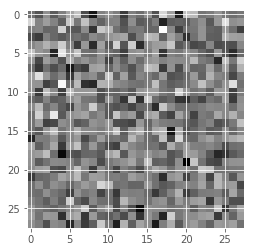

In [30]:
plt.imshow(pca_train_images[0].reshape(h, w), cmap='gray')

In [31]:
model1 = create_model(inpt = 28)
model1.summary()

# sgd = optimizers.SGD(lr=0.1, decay=1e-5, momentum=0.96, nesterov=True)
model1.compile(optimizer='sgd', loss='mse', metrics=['mae', 'accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [45]:
epochs = 500
history1 = model1.fit(pca_train_images, train_keypoints, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=64)

Train on 1712 samples, validate on 428 samples
Epoch 1/500
1712/1712 [==============================] - 23s 13ms/step - loss: 0.1595 - mean_absolute_error: 0.3282 - acc: 0.0824 - val_loss: 0.0910 - val_mean_absolute_error: 0.2524 - val_acc: 0.1822
Epoch 2/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0979 - mean_absolute_error: 0.2563 - acc: 0.2009 - val_loss: 0.0584 - val_mean_absolute_error: 0.1993 - val_acc: 0.3832
Epoch 3/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0774 - mean_absolute_error: 0.2258 - acc: 0.2558 - val_loss: 0.0422 - val_mean_absolute_error: 0.1669 - val_acc: 0.4159
Epoch 4/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0669 - mean_absolute_error: 0.2085 - acc: 0.2716 - val_loss: 0.0352 - val_mean_absolute_error: 0.1503 - val_acc: 0.4229
Epoch 5/500
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0590 - mean_absolute_error: 0.1951 - acc: 0.2786 - val_loss: 0.0314 - val_me

Epoch 42/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0214 - mean_absolute_error: 0.1159 - acc: 0.4778 - val_loss: 0.0148 - val_mean_absolute_error: 0.0943 - val_acc: 0.4322
Epoch 43/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0214 - mean_absolute_error: 0.1158 - acc: 0.4708 - val_loss: 0.0147 - val_mean_absolute_error: 0.0939 - val_acc: 0.4322
Epoch 44/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0210 - mean_absolute_error: 0.1146 - acc: 0.4743 - val_loss: 0.0146 - val_mean_absolute_error: 0.0934 - val_acc: 0.4322
Epoch 45/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0207 - mean_absolute_error: 0.1139 - acc: 0.4912 - val_loss: 0.0144 - val_mean_absolute_error: 0.0928 - val_acc: 0.4322
Epoch 46/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0205 - mean_absolute_error: 0.1133 - acc: 0.4766 - val_loss: 0.0142 - val_mean_absolute_error: 0.0921 - val_acc: 0.4322


Epoch 83/500
1712/1712 [==============================] - 3s 1ms/step - loss: 0.0144 - mean_absolute_error: 0.0946 - acc: 0.5578 - val_loss: 0.0123 - val_mean_absolute_error: 0.0848 - val_acc: 0.4322
Epoch 84/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0142 - mean_absolute_error: 0.0937 - acc: 0.5713 - val_loss: 0.0122 - val_mean_absolute_error: 0.0846 - val_acc: 0.4322
Epoch 85/500
1712/1712 [==============================] - 3s 1ms/step - loss: 0.0141 - mean_absolute_error: 0.0933 - acc: 0.5561 - val_loss: 0.0122 - val_mean_absolute_error: 0.0846 - val_acc: 0.4322
Epoch 86/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0141 - mean_absolute_error: 0.0936 - acc: 0.5794 - val_loss: 0.0121 - val_mean_absolute_error: 0.0842 - val_acc: 0.4322
Epoch 87/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0140 - mean_absolute_error: 0.0931 - acc: 0.5718 - val_loss: 0.0122 - val_mean_absolute_error: 0.0843 - val_acc: 0.4322


Epoch 124/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0115 - mean_absolute_error: 0.0840 - acc: 0.6133 - val_loss: 0.0112 - val_mean_absolute_error: 0.0805 - val_acc: 0.4322
Epoch 125/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0111 - mean_absolute_error: 0.0827 - acc: 0.5935 - val_loss: 0.0113 - val_mean_absolute_error: 0.0807 - val_acc: 0.4322
Epoch 126/500
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0115 - mean_absolute_error: 0.0840 - acc: 0.6081 - val_loss: 0.0115 - val_mean_absolute_error: 0.0814 - val_acc: 0.4322
Epoch 127/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0111 - mean_absolute_error: 0.0827 - acc: 0.6104 - val_loss: 0.0113 - val_mean_absolute_error: 0.0809 - val_acc: 0.4322
Epoch 128/500
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0111 - mean_absolute_error: 0.0828 - acc: 0.6250 - val_loss: 0.0114 - val_mean_absolute_error: 0.0810 - val_acc: 0.

Epoch 165/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0097 - mean_absolute_error: 0.0770 - acc: 0.6408 - val_loss: 0.0107 - val_mean_absolute_error: 0.0783 - val_acc: 0.4322
Epoch 166/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0096 - mean_absolute_error: 0.0768 - acc: 0.6489 - val_loss: 0.0107 - val_mean_absolute_error: 0.0782 - val_acc: 0.4322
Epoch 167/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0096 - mean_absolute_error: 0.0765 - acc: 0.6478 - val_loss: 0.0107 - val_mean_absolute_error: 0.0782 - val_acc: 0.4322
Epoch 168/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0096 - mean_absolute_error: 0.0767 - acc: 0.6361 - val_loss: 0.0107 - val_mean_absolute_error: 0.0782 - val_acc: 0.4322
Epoch 169/500
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0096 - mean_absolute_error: 0.0766 - acc: 0.6519 - val_loss: 0.0105 - val_mean_absolute_error: 0.0774 - val_acc: 0.

Epoch 206/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0084 - mean_absolute_error: 0.0717 - acc: 0.6671 - val_loss: 0.0103 - val_mean_absolute_error: 0.0765 - val_acc: 0.4322
Epoch 207/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0087 - mean_absolute_error: 0.0725 - acc: 0.6682 - val_loss: 0.0102 - val_mean_absolute_error: 0.0759 - val_acc: 0.4322
Epoch 208/500
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0084 - mean_absolute_error: 0.0716 - acc: 0.6618 - val_loss: 0.0103 - val_mean_absolute_error: 0.0763 - val_acc: 0.4322
Epoch 209/500
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0085 - mean_absolute_error: 0.0719 - acc: 0.6606 - val_loss: 0.0103 - val_mean_absolute_error: 0.0764 - val_acc: 0.4322
Epoch 210/500
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0084 - mean_absolute_error: 0.0712 - acc: 0.6828 - val_loss: 0.0102 - val_mean_absolute_error: 0.0759 - val_acc: 0.

Epoch 247/500
1712/1712 [==============================] - 3s 1ms/step - loss: 0.0078 - mean_absolute_error: 0.0684 - acc: 0.6893 - val_loss: 0.0098 - val_mean_absolute_error: 0.0743 - val_acc: 0.4322
Epoch 248/500
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0076 - mean_absolute_error: 0.0678 - acc: 0.6945 - val_loss: 0.0098 - val_mean_absolute_error: 0.0744 - val_acc: 0.4322
Epoch 249/500
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0078 - mean_absolute_error: 0.0683 - acc: 0.6694 - val_loss: 0.0098 - val_mean_absolute_error: 0.0745 - val_acc: 0.4322
Epoch 250/500
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0078 - mean_absolute_error: 0.0685 - acc: 0.6904 - val_loss: 0.0099 - val_mean_absolute_error: 0.0745 - val_acc: 0.4322
Epoch 251/500
1712/1712 [==============================] - 3s 1ms/step - loss: 0.0076 - mean_absolute_error: 0.0678 - acc: 0.6916 - val_loss: 0.0099 - val_mean_absolute_error: 0.0746 - val_acc: 0.

Epoch 288/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0071 - mean_absolute_error: 0.0651 - acc: 0.7021 - val_loss: 0.0095 - val_mean_absolute_error: 0.0731 - val_acc: 0.4322
Epoch 289/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0071 - mean_absolute_error: 0.0653 - acc: 0.7097 - val_loss: 0.0096 - val_mean_absolute_error: 0.0734 - val_acc: 0.4322
Epoch 290/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0071 - mean_absolute_error: 0.0655 - acc: 0.7021 - val_loss: 0.0095 - val_mean_absolute_error: 0.0729 - val_acc: 0.4322
Epoch 291/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0071 - mean_absolute_error: 0.0652 - acc: 0.7044 - val_loss: 0.0095 - val_mean_absolute_error: 0.0731 - val_acc: 0.4322
Epoch 292/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0070 - mean_absolute_error: 0.0650 - acc: 0.7103 - val_loss: 0.0095 - val_mean_absolute_error: 0.0731 - val_acc: 0.

Epoch 329/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0066 - mean_absolute_error: 0.0628 - acc: 0.7307 - val_loss: 0.0093 - val_mean_absolute_error: 0.0718 - val_acc: 0.4322
Epoch 330/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0066 - mean_absolute_error: 0.0625 - acc: 0.7208 - val_loss: 0.0093 - val_mean_absolute_error: 0.0720 - val_acc: 0.4322
Epoch 331/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0066 - mean_absolute_error: 0.0627 - acc: 0.7272 - val_loss: 0.0093 - val_mean_absolute_error: 0.0719 - val_acc: 0.4322
Epoch 332/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0066 - mean_absolute_error: 0.0628 - acc: 0.7179 - val_loss: 0.0093 - val_mean_absolute_error: 0.0719 - val_acc: 0.4322
Epoch 333/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0066 - mean_absolute_error: 0.0623 - acc: 0.7220 - val_loss: 0.0092 - val_mean_absolute_error: 0.0718 - val_acc: 0.

Epoch 370/500
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0062 - mean_absolute_error: 0.0605 - acc: 0.7255 - val_loss: 0.0090 - val_mean_absolute_error: 0.0707 - val_acc: 0.4322
Epoch 371/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0062 - mean_absolute_error: 0.0606 - acc: 0.7348 - val_loss: 0.0090 - val_mean_absolute_error: 0.0707 - val_acc: 0.4322
Epoch 372/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0063 - mean_absolute_error: 0.0609 - acc: 0.7342 - val_loss: 0.0090 - val_mean_absolute_error: 0.0710 - val_acc: 0.4322
Epoch 373/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0062 - mean_absolute_error: 0.0605 - acc: 0.7331 - val_loss: 0.0091 - val_mean_absolute_error: 0.0710 - val_acc: 0.4322
Epoch 374/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0062 - mean_absolute_error: 0.0606 - acc: 0.7266 - val_loss: 0.0090 - val_mean_absolute_error: 0.0708 - val_acc: 0.

Epoch 411/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0060 - mean_absolute_error: 0.0590 - acc: 0.7272 - val_loss: 0.0088 - val_mean_absolute_error: 0.0700 - val_acc: 0.4322
Epoch 412/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0060 - mean_absolute_error: 0.0591 - acc: 0.7342 - val_loss: 0.0088 - val_mean_absolute_error: 0.0698 - val_acc: 0.4322
Epoch 413/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0059 - mean_absolute_error: 0.0586 - acc: 0.7354 - val_loss: 0.0088 - val_mean_absolute_error: 0.0700 - val_acc: 0.4322
Epoch 414/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0059 - mean_absolute_error: 0.0588 - acc: 0.7296 - val_loss: 0.0088 - val_mean_absolute_error: 0.0700 - val_acc: 0.4322
Epoch 415/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0059 - mean_absolute_error: 0.0587 - acc: 0.7442 - val_loss: 0.0088 - val_mean_absolute_error: 0.0699 - val_acc: 0.

Epoch 452/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0056 - mean_absolute_error: 0.0571 - acc: 0.7506 - val_loss: 0.0087 - val_mean_absolute_error: 0.0693 - val_acc: 0.4322
Epoch 453/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0056 - mean_absolute_error: 0.0573 - acc: 0.7442 - val_loss: 0.0086 - val_mean_absolute_error: 0.0691 - val_acc: 0.4322
Epoch 454/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0056 - mean_absolute_error: 0.0570 - acc: 0.7465 - val_loss: 0.0086 - val_mean_absolute_error: 0.0692 - val_acc: 0.4322
Epoch 455/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0056 - mean_absolute_error: 0.0571 - acc: 0.7442 - val_loss: 0.0087 - val_mean_absolute_error: 0.0692 - val_acc: 0.4322
Epoch 456/500
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0056 - mean_absolute_error: 0.0573 - acc: 0.7354 - val_loss: 0.0087 - val_mean_absolute_error: 0.0693 - val_acc: 0.

Epoch 493/500
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0054 - mean_absolute_error: 0.0559 - acc: 0.7518 - val_loss: 0.0086 - val_mean_absolute_error: 0.0688 - val_acc: 0.4322
Epoch 494/500
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0054 - mean_absolute_error: 0.0558 - acc: 0.7442 - val_loss: 0.0085 - val_mean_absolute_error: 0.0687 - val_acc: 0.4322
Epoch 495/500
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0054 - mean_absolute_error: 0.0562 - acc: 0.7442 - val_loss: 0.0085 - val_mean_absolute_error: 0.0687 - val_acc: 0.4322
Epoch 496/500
1712/1712 [==============================] - 3s 2ms/step - loss: 0.0054 - mean_absolute_error: 0.0561 - acc: 0.7523 - val_loss: 0.0085 - val_mean_absolute_error: 0.0686 - val_acc: 0.4322
Epoch 497/500
1712/1712 [==============================] - 4s 2ms/step - loss: 0.0054 - mean_absolute_error: 0.0562 - acc: 0.7518 - val_loss: 0.0085 - val_mean_absolute_error: 0.0685 - val_acc: 0.

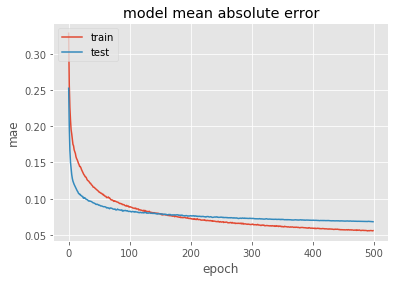

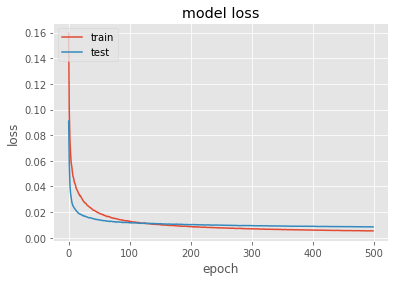

In [47]:
def visualize(history):
  plt.plot(history.history['mean_absolute_error'])
  plt.plot(history.history['val_mean_absolute_error'])
  plt.title('model mean absolute error')
  plt.ylabel('mae')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
visualize(history1)

[array([65.188934], dtype=float32), array([30.987871], dtype=float32), array([58.421585], dtype=float32), array([71.391914], dtype=float32), array([37.06991], dtype=float32), array([24.242737], dtype=float32), array([55.730316], dtype=float32), array([77.47401], dtype=float32), array([40.256557], dtype=float32), array([18.45501], dtype=float32), array([47.883053], dtype=float32), array([61.825718], dtype=float32), array([34.0643], dtype=float32), array([47.893288], dtype=float32), array([48.221405], dtype=float32)] [array([38.049072], dtype=float32), array([37.803574], dtype=float32), array([38.65146], dtype=float32), array([38.828266], dtype=float32), array([38.71698], dtype=float32), array([38.81113], dtype=float32), array([30.390842], dtype=float32), array([31.129406], dtype=float32), array([30.397312], dtype=float32), array([31.813663], dtype=float32), array([56.165283], dtype=float32), array([73.880455], dtype=float32), array([73.56058], dtype=float32), array([69.714096], dtype=fl

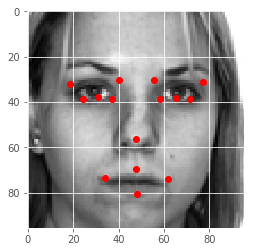

In [48]:
import random
img = train_images[k]
img1 = pca.transform(img.reshape(1, -1))
pre = model1.predict(img1.reshape(-1, 28, 28, 1))
pre = pre.reshape(-1,1)
pre = pre*48+48
show_img(img, pre)

## Test Cases

In [32]:
model1.load_weights("keypoint_pca.h5")

[array([65.164345], dtype=float32), array([30.75405], dtype=float32), array([58.55085], dtype=float32), array([71.55614], dtype=float32), array([37.15717], dtype=float32), array([24.379017], dtype=float32), array([55.87626], dtype=float32), array([77.51579], dtype=float32), array([39.902054], dtype=float32), array([18.038744], dtype=float32), array([47.840347], dtype=float32), array([61.913177], dtype=float32), array([34.18611], dtype=float32), array([47.855614], dtype=float32), array([48.20711], dtype=float32)] [array([37.81352], dtype=float32), array([37.704075], dtype=float32), array([38.63164], dtype=float32), array([38.466984], dtype=float32), array([38.814476], dtype=float32), array([38.70341], dtype=float32), array([30.12753], dtype=float32), array([30.867363], dtype=float32), array([30.3393], dtype=float32), array([31.657423], dtype=float32), array([56.130196], dtype=float32), array([73.997375], dtype=float32), array([73.932594], dtype=float32), array([70.14987], dtype=float32)

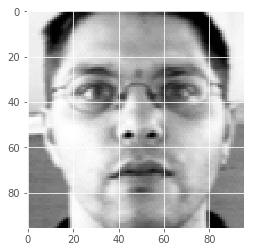

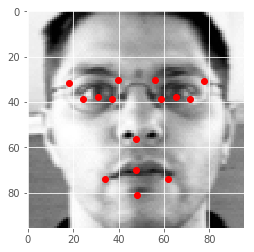

In [33]:
import random
k = random.randint(0,2000)
img = train_images[k]
show_img(img)
img1 = pca.transform(img.reshape(1, -1))
pre = model1.predict(img1.reshape(-1, 28, 28, 1))
pre = pre.reshape(-1,1)
pre = pre*48+48
show_img(img, pre)

In [34]:
np.min(img),np.max(img)

(0.0, 0.80784315)

In [43]:
import numpy as np
import cv2
from skimage import exposure

face_cascade = cv2.CascadeClassifier('face2.xml')

(762, 572)
[array([65.23459], dtype=float32), array([30.687061], dtype=float32), array([58.848396], dtype=float32), array([71.654884], dtype=float32), array([37.307014], dtype=float32), array([24.25581], dtype=float32), array([55.809265], dtype=float32), array([77.7072], dtype=float32), array([39.865437], dtype=float32), array([17.894205], dtype=float32), array([48.085857], dtype=float32), array([61.83362], dtype=float32), array([34.19626], dtype=float32), array([47.915337], dtype=float32), array([48.508358], dtype=float32)] [array([37.89865], dtype=float32), array([37.590008], dtype=float32), array([38.81735], dtype=float32), array([38.61843], dtype=float32), array([38.773132], dtype=float32), array([38.879196], dtype=float32), array([30.56485], dtype=float32), array([30.958412], dtype=float32), array([30.474455], dtype=float32), array([31.632284], dtype=float32), array([56.188507], dtype=float32), array([73.5251], dtype=float32), array([73.85452], dtype=float32), array([69.90657], dt

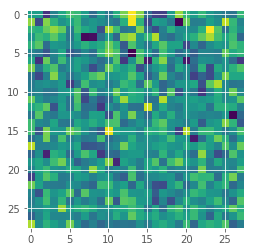

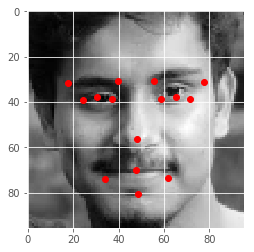

In [51]:
img = cv2.imread("test/2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
faces = face_cascade.detectMultiScale(img)
# print(faces[0])
(x, y, w, h) = faces[1]
cropped_img = img[y: y+h,x: x+h]
cropped_img =cropped_img/255
cropped_img = cv2.resize(cropped_img,(96,96))
show_img(cropped_img)
t_img_1 = cv2.GaussianBlur(cropped_img,(5,5),0)
img_eq = exposure.equalize_hist(t_img_1)
# show_img(img_eq)
img1 = pca.transform(img_eq.reshape(1, -1))
plt.imshow(img1.reshape(28,28))
pre = model1.predict(img1.reshape(-1, 28, 28, 1))
pre = pre.reshape(-1,1)
pre = pre*48+48
show_img(cropped_img, pre)
# cv2.flip(cropped_img, 1)

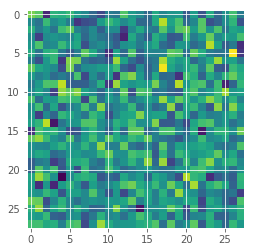

In [82]:
plt.imshow(img1.reshape(28,28))